In [0]:
import numpy as np
import matplotlib
%matplotlib inline

from matplotlib import pyplot as plt

In [0]:
def f(x):
    return np.power(x, 2) + 4 * np.sin(x) - 2

In [0]:
a = 10

In [0]:
x = np.arange(-a, a, 0.001, np.float)

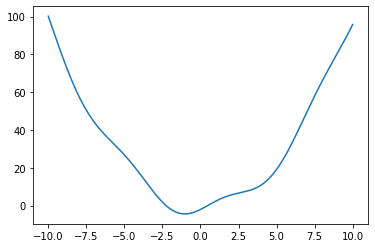

In [7]:
plt.plot(x, f(x))

# L

In [0]:
def test_func(a, b):
  return a + b

In [10]:
test_func(12, 123)

135